<a href="https://colab.research.google.com/github/Ludvins/2024_PAC-Chernoff-Bound/blob/main/Figure5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
%%capture
!sudo apt-get update
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.special import logsumexp

In [18]:
import matplotlib
import matplotlib as mpl

""" Set the matplotlib style to latex format """
plt.rcParams.update(
    {
        "font.size": 10,
        "text.usetex": True,
        "text.latex.preamble": r"\usepackage{amsfonts}\usepackage{bm}",
    }
)
mpl.rc("font", family="Times New Roman")
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42
plt.rcParams["figure.figsize"] = (16, 9)
fontsize = 26
matplotlib.rcParams.update({"font.size": fontsize})


In [19]:
model1 = lambda x : x
model2 = lambda x : x + 0.05*np.sin(x*50)

In [20]:
x = np.linspace(0, 1, 100)

noise = 0.02

rng = np.random.default_rng(1234)
def data_generating_1(x):
    return model1(x) + noise * rng.normal(size = x.shape[0])

def data_generating_2(x):
    return model2(x) + noise * rng.normal(size = x.shape[0])

In [21]:

def _eval(losses, lamb, a):
  jensen_val= logsumexp(- lamb * losses, 0) - np.log(losses.shape[0]) + lamb *np.mean(losses)
  return lamb*a - jensen_val

def aux_rate_function_TernarySearch(log_p, s_value, low, high, epsilon):

  while (high - low) > epsilon:
    mid1 = low + (high - low) / 3
    mid2 = high - (high - low) / 3
    if _eval(log_p, mid1, s_value) < _eval(log_p, mid2, s_value):
        low = mid1
    else:
        high = mid2

  # Return the midpoint of the final range
  mid = (low + high) / 2
  return [_eval(log_p, mid, s_value), mid, (mid*s_value - _eval(log_p, mid, s_value))]


In [22]:
# Generate 1000 samples from data_generating_1, and compute the rmse of each model for each sample. Store them in a numpy array

n_samples = 100000
rmse_model1_d1 = np.zeros(n_samples)
rmse_model2_d1 = np.zeros(n_samples)

for i in range(n_samples):
  y = data_generating_1(x)
  rmse_model1_d1[i] = np.sqrt(np.mean((y - model1(x))**2))
  rmse_model2_d1[i] = np.sqrt(np.mean((y - model2(x))**2))

print("Model 1: ", rmse_model1_d1.mean())
print("Model 2: ", rmse_model2_d1.mean())

Model 1:  0.01994966671676876
Model 2:  0.04050466137261743


In [23]:
print("Model 1: ", rmse_model1_d1.var())
print("Model 2: ", rmse_model2_d1.var())

Model 1:  1.974532645536249e-06
Model 2:  3.473017201244671e-06


In [24]:
a_values = np.linspace(0, 0.01, 100)

In [25]:
# prompt: Do the same with data_generating_2

# Generate 1000 samples from data_generating_2, and compute the rmse of each model for each sample. Store them in a numpy array

n_samples = 10000
rmse_model1_d2 = np.zeros(n_samples)
rmse_model2_d2 = np.zeros(n_samples)

for i in range(n_samples):
  y = data_generating_2(x)
  rmse_model1_d2[i] = np.sqrt(np.mean((y - model1(x))**2))
  rmse_model2_d2[i] = np.sqrt(np.mean((y - model2(x))**2))


In [26]:
# prompt: Make four plots 2x2 with the histograms of the mean of rmse_model1 and rmse_model2 with data_generating_1 and data_generating_2 in subsets of size 50. Plot vertical lines where the mean of the histogram is

import matplotlib.pyplot as plt
import numpy as np
# Generate data and calculate RMSEs for subsets of size 50
subset_size = 10
n_subsets = 1000

rmse_model1_d1_s = np.zeros(n_subsets)
rmse_model2_d1_s = np.zeros(n_subsets)
rmse_model1_d2_s = np.zeros(n_subsets)
rmse_model2_d2_s = np.zeros(n_subsets)

for i in range(n_subsets):
    x = rng.uniform(size=subset_size)
    y1 = data_generating_1(x)
    y2 = data_generating_2(x)
    rmse_model1_d1_s[i] = np.sqrt(np.mean((y1 - model1(x))**2))
    rmse_model2_d1_s[i] = np.sqrt(np.mean((y1 - model2(x))**2))
    rmse_model1_d2_s[i] = np.sqrt(np.mean((y2 - model1(x))**2))
    rmse_model2_d2_s[i] = np.sqrt(np.mean((y2 - model2(x))**2))


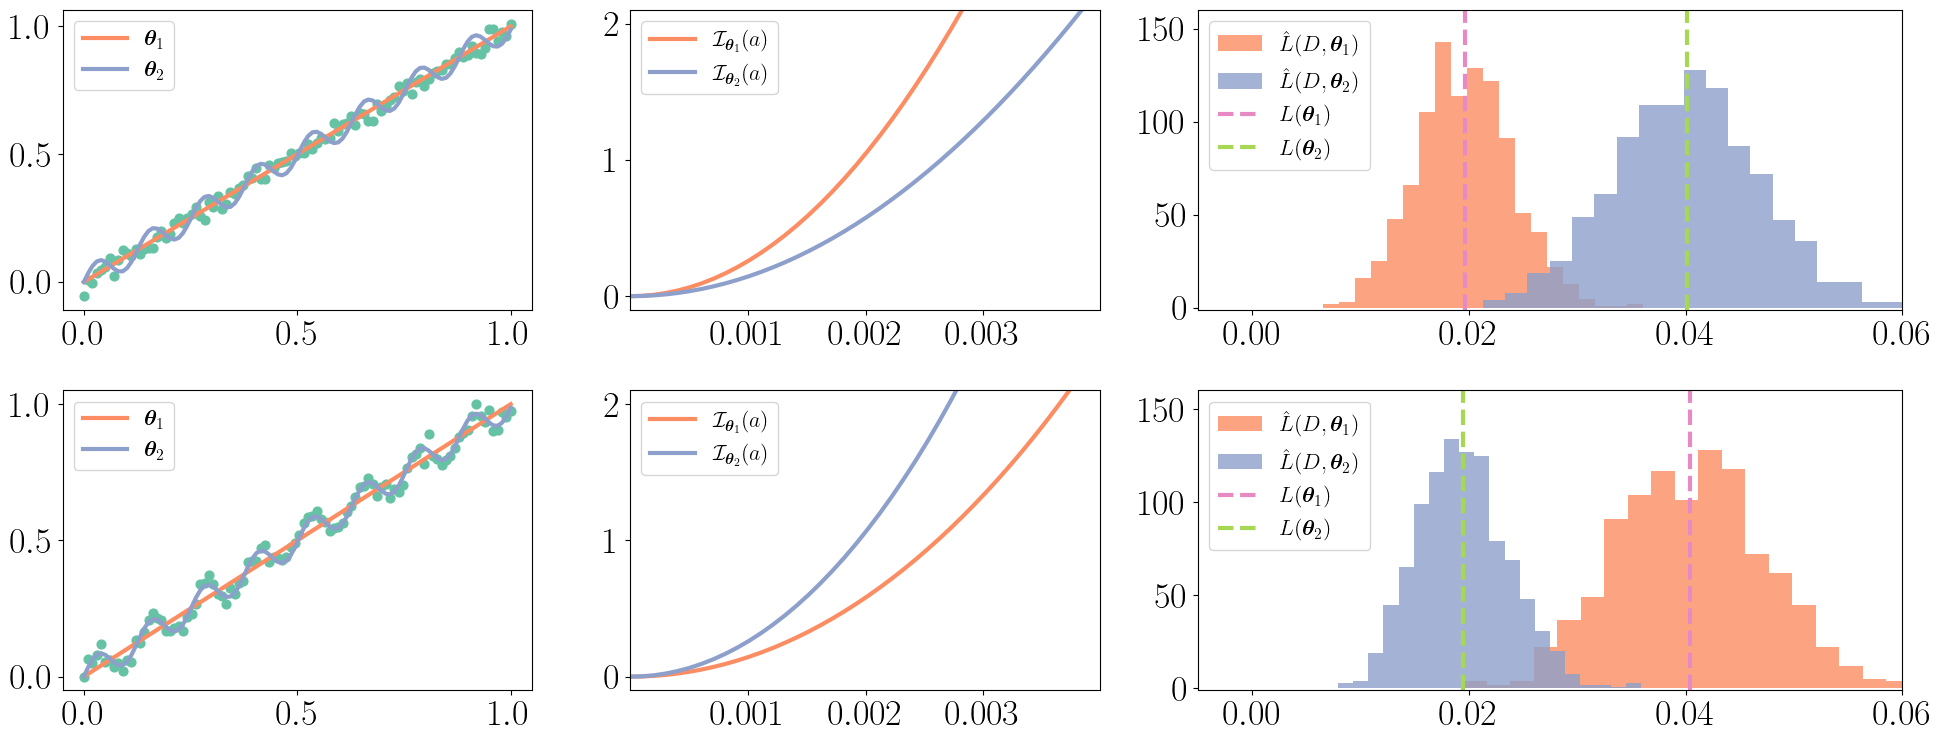

In [27]:
#Make a plot with all 8 images together in a 2x4 grid

import matplotlib.pyplot as plt
import numpy as np
# Create a 2x4 grid of subplots with proportions
fig, ax = plt.subplots(2, 3, figsize=(20, 8), gridspec_kw={'width_ratios': [1, 1, 1.5]})

jet = matplotlib.colormaps['Set2']
x = np.linspace(0, 1, 100)
# Plot for data_generating_1
ax[0, 0].scatter(x, data_generating_1(x),color=jet(0), s= 40)
ax[0, 0].plot(x, model1(x), label=r'$\bm{\theta}_1$', color=jet(1), linewidth=3)
ax[0, 0].plot(x, model2(x), label=r'$\bm{\theta}_2$', color=jet(2), linewidth=3)
ax[0, 0].legend(fontsize = 16)
#ax[0, 0].set_ylabel(r'$\nu_1$')

# Plot for data_generating_2
ax[1, 0].scatter(x, data_generating_2(x), color=jet(0), s= 40)
ax[1, 0].plot(x, model1(x), label=r'$\bm{\theta}_1$', color=jet(1), linewidth=3)
ax[1, 0].plot(x, model2(x), label=r'$\bm{\theta}_2$', color=jet(2), linewidth=3)
ax[1, 0].legend(fontsize = 16)
#ax[1, 0].set_ylabel(r'$\nu_2$')


# Plot histograms
ax[0, 2].hist(rmse_model1_d1_s, bins=20, label = r"$\hat{L}(D, \bm{\theta}_1)$", color=jet(1), alpha = 0.8)
ax[0, 2].hist(rmse_model2_d1_s, bins=20, label = r"$\hat{L}(D, \bm{\theta}_2)$", color=jet(2), alpha = 0.8)
ax[0, 2].axvline(rmse_model1_d1_s.mean(), color=jet(3), linestyle='dashed', linewidth=3, label = r"$L(\bm{\theta}_1)$")
ax[0, 2].axvline(rmse_model2_d1_s.mean(), color=jet(4), linestyle='dashed', linewidth=3, label = r"$L(\bm{\theta}_2)$")
ax[0, 2].legend(fontsize = 16)

ax[1, 2].hist(rmse_model1_d2_s, bins=20, label = r"$\hat{L}(D, \bm{\theta}_1)$", color=jet(1), alpha = 0.8)
ax[1, 2].hist(rmse_model2_d2_s, bins=20, label = r"$\hat{L}(D, \bm{\theta}_2)$", color=jet(2), alpha = 0.8)
ax[1, 2].axvline(rmse_model1_d2_s.mean(), color=jet(3), linestyle='dashed', linewidth=3, label = r"$L(\bm{\theta}_1)$")
ax[1, 2].axvline(rmse_model2_d2_s.mean(), color=jet(4), linestyle='dashed', linewidth=3, label = r"$L(\bm{\theta}_2)$")
ax[1, 2].legend(fontsize = 16)


# Plot rate functions
a_values = np.linspace(0, 0.01, 100)
rate_1_d1 = np.array([aux_rate_function_TernarySearch(rmse_model1_d1, a, 0, 100000000, 0.0001)[0] for a in a_values])
rate_2_d1 = np.array([aux_rate_function_TernarySearch(rmse_model2_d1, a, 0, 100000000, 0.0001)[0] for a in a_values])
ax[0, 1].plot(a_values, rate_1_d1, label=r"$\mathcal{I}_{\bm{\theta}_1}(a)$", color = jet(1), linewidth=3)
ax[0, 1].plot(a_values, rate_2_d1, label=r"$\mathcal{I}_{\bm{\theta}_2}(a)$", color = jet(2), linewidth=3)
ax[0, 1].set_ylim(-0.1,2.1)
ax[0, 1].set_xlim(0.,0.00399)
ax[0, 1].set_xticks([0.001, 0.002, 0.003])
ax[0, 1].legend(fontsize = 16)

rate_1_d2 = np.array([aux_rate_function_TernarySearch(rmse_model1_d2, a, 0, 100000000, 0.0001)[0] for a in a_values])
rate_2_d2 = np.array([aux_rate_function_TernarySearch(rmse_model2_d2, a, 0, 100000000, 0.0001)[0] for a in a_values])
ax[1, 1].plot(a_values, rate_1_d2, label=r"$\mathcal{I}_{\bm{\theta}_1}(a)$", color = jet(1), linewidth=3)
ax[1, 1].plot(a_values, rate_2_d2, label=r"$\mathcal{I}_{\bm{\theta}_2}(a)$", color = jet(2), linewidth=3)
ax[1, 1].set_ylim(-0.1,2.1)
ax[1, 1].set_xlim(0.,0.00399)
ax[1, 1].set_xticks([0.001, 0.002, 0.003])

ax[1, 1].legend(fontsize = 16)

# Set limits and labels
ax[0, 2].set_xlim(-0.005, 0.06)
ax[1, 2].set_xlim(-0.005, 0.06)
ax[0, 2].set_ylim(-1, 160)
ax[1, 2].set_ylim(-1, 160)
plt.savefig("toy.pdf", format = "pdf",bbox_inches='tight')

plt.tight_layout()
plt.show()
